In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
from config import db_password

In [3]:
database = "RealLeads"

In [4]:
# Make your local connection to the database in PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database=database,
    user="postgres",
    password=db_password)

In [5]:
# Table selection Function
def table_select(table_name):
    table =f"select * from \"{table_name}\""
    dataFrame = pd.read_sql(table, conn)
    return dataFrame

In [6]:
sales_data_df = table_select("sales_data_clean")

In [7]:
ml_Temp = pd.read_csv("../Resources/ml_Data_Cleaned_Supervised_Learning.csv")
ml_df = pd.read_csv("../Resources/ml_DataFrame_No_NAN.csv")


In [8]:
ml_Temp["MLSNumber"] = ml_df["MLSNumber"]

In [9]:
ml_Temp = ml_Temp[["MLSNumber","Orig_List_Price","Zip_Code","Subdivision","School_District","HOA_YN","Structure_Type","Acres","InteriorSqFt","AboveGradeSqFt","BelowGradeSqFt","Bedrooms","Baths","NumberofStories","Central_Air_YN","Water","Basement_YN","Garage_YN","ExteriorMaterial","YearBuilt"]]

In [10]:
delta_df = pd.read_csv("../Resources/randomforest_prediction.csv")

# Getting Data ready to predict sold price

In [11]:
ml_Temp

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,DENC518086,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,0.0,4.0,2.0,27,2,12,2,2,205,87
1,DENC518982,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,352.0,3.0,2.0,27,2,12,2,1,43,105
2,DENC512992,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,0.0,2.0,2.0,27,2,12,2,1,291,114
3,DENC512104,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,0.0,2.0,3.0,27,2,12,2,2,270,114
4,DENC506356,195000.0,13,546,4,1,1,0.14,0.0,0.0,0.0,4.0,3.0,12,1,12,2,2,237,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,1,86,4,2,1,1.03,3045.0,3045.0,0.0,3.0,2.0,11,2,12,2,2,283,87
4914,DENC520392,639000.0,1,471,4,2,1,0.75,3811.0,3175.0,636.0,4.0,4.0,12,2,15,2,2,211,102
4915,DENC2014038,529900.0,1,488,4,1,1,0.39,3191.0,2850.0,341.0,4.0,3.0,12,2,12,2,2,43,118
4916,DENC2005484,620000.0,1,419,4,1,1,0.54,3425.0,3425.0,0.0,4.0,3.0,12,2,12,2,2,141,121


In [12]:
delta_df

,MLSNumber,Zip_Code,Orig_List_Price,Pred_List_Price_RFR_Unscaled,Pred_List_Price_RFR_Scaled,Price_Diff_RFR_Unscaled,Price_Diff_RFR_Scaled
0,DENC518086,19808,330000.0,330013.990000,347853.000000,-13.990000,-17853.000000
1,DENC518982,19808,215500.0,224268.250000,230609.980000,-8768.250000,-15109.980000
2,DENC512992,19808,200000.0,207087.000000,220660.656667,-7087.000000,-20660.656667
3,DENC512104,19808,219900.0,230527.150000,234306.800000,-10627.150000,-14406.800000
4,DENC506356,19808,195000.0,218463.000000,258151.000000,-23463.000000,-63151.000000
...,...,...,...,...,...,...,...
4913,DENC520114,19707,595000.0,449425.990000,526757.000000,145574.010000,68243.000000
4914,DENC520392,19707,639000.0,507765.940000,584102.000000,131234.060000,54898.000000
4915,DENC2014038,19707,529900.0,514999.990000,521639.990000,14900.010000,8260.010000
4916,DENC2005484,19707,620000.0,580620.980000,582201.000000,39379.020000,37799.000000


In [13]:
rfr_df = pd.DataFrame.copy(ml_Temp,deep=True)

In [14]:
rfr_df["Pred_Orig_List_Price"] = delta_df["Pred_List_Price_RFR_Scaled"]

In [15]:
rfr_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,...,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt,Pred_Orig_List_Price
0,DENC518086,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,...,4.0,2.0,27,2,12,2,2,205,87,347853.000000
1,DENC518982,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,...,3.0,2.0,27,2,12,2,1,43,105,230609.980000
2,DENC512992,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,...,2.0,2.0,27,2,12,2,1,291,114,220660.656667
3,DENC512104,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,...,2.0,3.0,27,2,12,2,2,270,114,234306.800000
4,DENC506356,195000.0,13,546,4,1,1,0.14,0.0,0.0,...,4.0,3.0,12,1,12,2,2,237,83,258151.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,1,86,4,2,1,1.03,3045.0,3045.0,...,3.0,2.0,11,2,12,2,2,283,87,526757.000000
4914,DENC520392,639000.0,1,471,4,2,1,0.75,3811.0,3175.0,...,4.0,4.0,12,2,15,2,2,211,102,584102.000000
4915,DENC2014038,529900.0,1,488,4,1,1,0.39,3191.0,2850.0,...,4.0,3.0,12,2,12,2,2,43,118,521639.990000
4916,DENC2005484,620000.0,1,419,4,1,1,0.54,3425.0,3425.0,...,4.0,3.0,12,2,12,2,2,141,121,582201.000000


In [16]:
rfr_df = pd.merge(rfr_df,sales_data_df[["MLSNumber","Sold_Price"]],on='MLSNumber')

In [17]:
rfr_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,...,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt,Pred_Orig_List_Price,Sold_Price
0,DENC518086,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,...,2.0,27,2,12,2,2,205,87,347853.000000,335000.0
1,DENC518982,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,...,2.0,27,2,12,2,1,43,105,230609.980000,200000.0
2,DENC512992,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,...,2.0,27,2,12,2,1,291,114,220660.656667,200000.0
3,DENC512104,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,...,3.0,27,2,12,2,2,270,114,234306.800000,200000.0
4,DENC506356,195000.0,13,546,4,1,1,0.14,0.0,0.0,...,3.0,12,1,12,2,2,237,83,258151.000000,201000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,1,86,4,2,1,1.03,3045.0,3045.0,...,2.0,11,2,12,2,2,283,87,526757.000000,595000.0
4914,DENC520392,639000.0,1,471,4,2,1,0.75,3811.0,3175.0,...,4.0,12,2,15,2,2,211,102,584102.000000,595000.0
4915,DENC2014038,529900.0,1,488,4,1,1,0.39,3191.0,2850.0,...,3.0,12,2,12,2,2,43,118,521639.990000,600000.0
4916,DENC2005484,620000.0,1,419,4,1,1,0.54,3425.0,3425.0,...,3.0,12,2,12,2,2,141,121,582201.000000,600000.0


In [18]:
rfr_df = rfr_df[["MLSNumber","Orig_List_Price","Pred_Orig_List_Price","Sold_Price","Zip_Code","Subdivision","School_District","HOA_YN","Structure_Type","Acres","InteriorSqFt","AboveGradeSqFt","BelowGradeSqFt","Bedrooms","Baths","NumberofStories","Central_Air_YN","Water","Basement_YN","Garage_YN","ExteriorMaterial","YearBuilt"]]

In [19]:
rfr_df

,MLSNumber,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,...,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,DENC518086,330000.0,347853.000000,335000.0,13,461,4,2,1,0.26,...,0.0,4.0,2.0,27,2,12,2,2,205,87
1,DENC518982,215500.0,230609.980000,200000.0,13,399,4,1,3,0.06,...,352.0,3.0,2.0,27,2,12,2,1,43,105
2,DENC512992,200000.0,220660.656667,200000.0,13,618,4,1,3,0.05,...,0.0,2.0,2.0,27,2,12,2,1,291,114
3,DENC512104,219900.0,234306.800000,200000.0,13,190,4,2,3,0.05,...,0.0,2.0,3.0,27,2,12,2,2,270,114
4,DENC506356,195000.0,258151.000000,201000.0,13,546,4,1,1,0.14,...,0.0,4.0,3.0,12,1,12,2,2,237,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,526757.000000,595000.0,1,86,4,2,1,1.03,...,0.0,3.0,2.0,11,2,12,2,2,283,87
4914,DENC520392,639000.0,584102.000000,595000.0,1,471,4,2,1,0.75,...,636.0,4.0,4.0,12,2,15,2,2,211,102
4915,DENC2014038,529900.0,521639.990000,600000.0,1,488,4,1,1,0.39,...,341.0,4.0,3.0,12,2,12,2,2,43,118
4916,DENC2005484,620000.0,582201.000000,600000.0,1,419,4,1,1,0.54,...,0.0,4.0,3.0,12,2,12,2,2,141,121


In [20]:
housing_price_df = pd.DataFrame.copy(rfr_df[["MLSNumber","Orig_List_Price","Pred_Orig_List_Price","Sold_Price"]],deep=True)

In [21]:
housing_price_df["Zip_Code"] = ml_df["Zip_Code"]

In [22]:
housing_price_df = housing_price_df[["MLSNumber","Zip_Code","Orig_List_Price","Pred_Orig_List_Price","Sold_Price"]]

In [23]:
housing_price_df.sample(5)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_Orig_List_Price,Sold_Price
700,DENC2016556,19808,335000.0,317265.94,360000.0
3229,DENC510280,19720,304900.0,364372.97,315000.0
3134,DENC507746,19720,250000.0,265368.00,265000.0
3430,DENC2008440,19720,215000.0,247288.48,225000.0
2201,DENC499864,19803,359900.0,427963.96,365000.0


In [24]:
rfr_df = rfr_df.drop(rfr_df.columns[[0,1]] , axis=1)

# Beginning Scaling and splitting for mlModel

In [25]:
X = rfr_df.drop(columns="Sold_Price")
y = rfr_df["Sold_Price"]

In [26]:
data_scaler =StandardScaler()

In [27]:
rfr_df_Scaled = data_scaler.fit_transform(rfr_df.drop(columns="Sold_Price"))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(3934, 19)

In [29]:
#Scaling Training Data
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

#Scaliing the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# RANDOM FOREST REGRESSOR 

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr_model = RandomForestRegressor(n_jobs=-1 , random_state=40)

rfr_model = rfr_model.fit(X_train_scaled,y_train)

In [32]:
rfr_pred = rfr_model.predict(X_test_scaled)

In [33]:
rfr_pred

array([312573.29      , 454727.5       , 305539.        , 412407.        ,
       473309.        , 283584.98      , 276018.69      , 289030.5       ,
       220221.8       , 265556.29      , 343538.02      , 224839.        ,
       290167.        , 392021.79      , 555414.        , 541757.2       ,
       559103.5       , 261355.01      , 281062.73      , 283902.73      ,
       209381.8       , 351500.        , 297272.        , 263184.16666667,
       305363.5       , 241252.16      , 389551.8       , 316927.5       ,
       219204.        , 424189.04      , 241984.16666667, 268399.        ,
       240369.        , 370131.        , 245055.        , 270905.25      ,
       260016.24      , 288966.5       , 250581.33333333, 277375.31      ,
       304958.1       , 375237.77      , 337964.        , 379682.22      ,
       273103.        , 228148.61333333, 248249.98      , 462434.        ,
       270745.66666667, 275444.66666667, 290723.02      , 417284.15      ,
       226531.56      , 2

In [34]:
rfr_model.score(X_test_scaled,y_test)

0.8620385960793743

In [35]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error ,r2_score
def show_score(model):
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_test_scaled)
    scores={"Training MAE" : mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_test, val_pred),
            "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_pred)),
            "Valid RMSLE" :  np.sqrt(mean_squared_log_error(y_test,val_pred)),
            "Training R^2" : r2_score(y_train, train_pred),
            "Valid R^2" : r2_score(y_test,val_pred)
           }
    return scores

In [36]:
show_score(rfr_model)

{'Training MAE': 9536.110439029704,
 'Valid MAE': 25638.233789198606,
 'Training RMSLE': 0.04081425100179144,
 'Valid RMSLE': 0.10493354561205767,
 'Training R^2': 0.9815139753111272,
 'Valid R^2': 0.8620385960793743}

In [37]:
#filename = 'RFR_Scaled_SoldPrice.sav'
#pickle.dump(rfr_model, open(filename, 'wb'))

## To load model later:
```
 //load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
```

## Attaching data back

In [38]:
test_pred = rfr_model.predict(rfr_df_Scaled)

In [39]:
housing_price_df["Pred_Sold_Price"] = test_pred

In [40]:
housing_price_df.sample(5)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Pred_Sold_Price
4806,DENC2001824,19707,384900.0,401969.00,384900.0,404381.00
4535,DENC2000816,19711,499900.0,506210.93,455000.0,486649.50
3089,DENC523128,19720,249900.0,248383.00,250000.0,258660.00
3661,DENC507100,19720,290000.0,293683.00,305000.0,268098.14
1871,DENC512570,19804,289900.0,268312.00,300000.0,276504.96


In [41]:
housing_price_df["Price_Diff_Orig_Price"] = housing_price_df["Orig_List_Price"] - housing_price_df["Pred_Orig_List_Price"]

In [42]:
housing_price_df["Price_Diff_Sold_Price"] = housing_price_df["Sold_Price"] - housing_price_df["Pred_Sold_Price"]

In [43]:
housing_price_df.sample(3)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Pred_Sold_Price,Price_Diff_Orig_Price,Price_Diff_Sold_Price
3167,DENC524512,19720,269900.0,288213.99,280000.0,265266.98,-18313.99,14733.02
301,DENC507080,19808,339900.0,312043.50,347500.0,289181.98,27856.50,58318.02
3884,DENC522832,19711,225000.0,259941.90,245000.0,275661.23,-34941.90,-30661.23


In [60]:
#housing_price_df.to_csv("../Resources/ml_housing_price.csv",index=False)

In [45]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [46]:
pf = feature_plot(X_train.columns, rfr_model.feature_importances_)

# VISUALIZATION

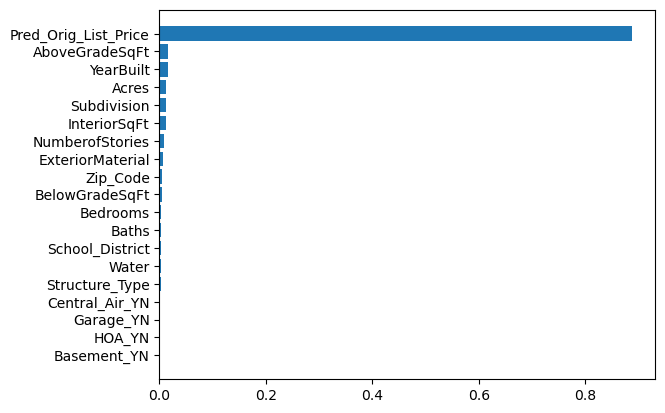

In [47]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

In [48]:
pf

,features,feature_importances
0,Pred_Orig_List_Price,0.887691
1,AboveGradeSqFt,0.016946
2,YearBuilt,0.016095
3,Acres,0.013125
4,Subdivision,0.012254
5,InteriorSqFt,0.011328
6,NumberofStories,0.007955
7,ExteriorMaterial,0.007196
8,Zip_Code,0.004994
9,BelowGradeSqFt,0.003828


In [49]:
zipcode_price_table = housing_price_df[["Orig_List_Price","Pred_Orig_List_Price","Sold_Price","Pred_Sold_Price"]].groupby(housing_price_df["Zip_Code"]).mean()

In [50]:
zipcode_price_table["Average_Diff_Orig_Price"] = zipcode_price_table["Orig_List_Price"] - zipcode_price_table["Pred_Orig_List_Price"]

In [51]:
zipcode_price_table["Average_Diff_Sold_Price"] = zipcode_price_table["Sold_Price"] - zipcode_price_table["Pred_Sold_Price"]

In [52]:
zipcode_price_table

,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Pred_Sold_Price,Average_Diff_Orig_Price,Average_Diff_Sold_Price
Zip_Code,,,,,,
19707,434042.989091,434512.721479,433419.174545,429190.638255,-469.732388,4228.536291
19711,359394.520101,365734.074506,364365.370603,362193.238575,-6339.554405,2172.132028
19720,275412.582503,286382.239500,280407.118494,285786.571963,-10969.656997,-5379.453469
19732,580000.000000,457743.610000,541333.333333,475516.333333,122256.390000,65817.000000
19736,325000.000000,308262.200000,262500.000000,270759.000000,16737.800000,-8259.000000
19801,277116.125000,279961.370278,271316.947917,275937.475417,-2845.245278,-4620.527500
19802,275578.648536,291996.678940,278018.184100,284432.641450,-16418.030404,-6414.457350
19803,396896.794286,395115.382825,396682.449524,393590.894743,1781.411460,3091.554781
19804,250353.475783,262391.690503,254941.646724,261974.714716,-12038.214720,-7033.067992


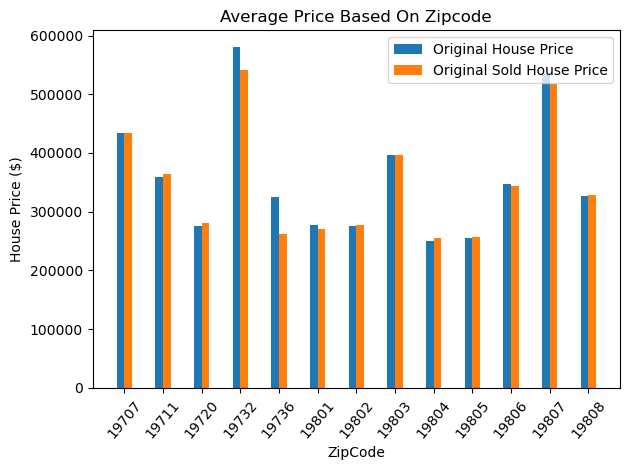

In [53]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1,zipcode_price_table.Orig_List_Price,0.2,label="Original House Price")
plt.bar(X_axis + 0.1,zipcode_price_table.Sold_Price,0.2,label="Original Sold House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/price_diff_zipcode.png" ,dpi=400)
plt.show()

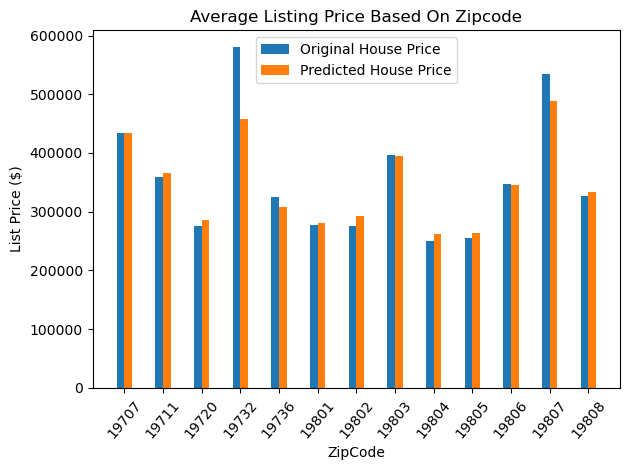

In [54]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1,zipcode_price_table.Orig_List_Price,0.2,label="Original House Price")
plt.bar(X_axis + 0.1,zipcode_price_table.Pred_Orig_List_Price,0.2,label="Predicted House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("List Price ($)")
plt.title("Average Listing Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/orig_price_diff_pred_zipcode.png" ,dpi=400)
plt.show()

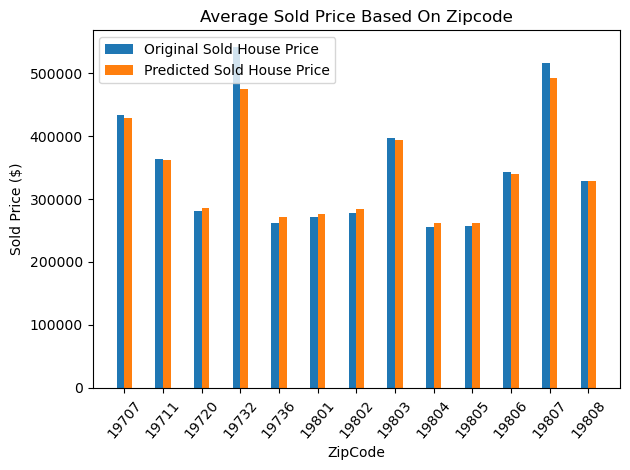

In [55]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1,zipcode_price_table.Sold_Price,0.2,label="Original Sold House Price")
plt.bar(X_axis + 0.1,zipcode_price_table.Pred_Sold_Price,0.2,label="Predicted Sold House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("Sold Price ($)")
plt.title("Average Sold Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/sold_price_diff_pred_zipcode.png" ,dpi=400)
plt.show()

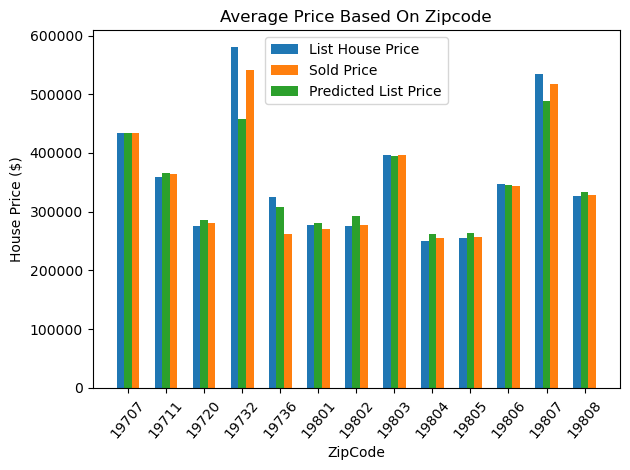

In [56]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,zipcode_price_table.Orig_List_Price,0.2,label="List House Price")
plt.bar(X_axis + 0.2,zipcode_price_table.Sold_Price,0.2,label="Sold Price")
plt.bar(X_axis,zipcode_price_table.Pred_Orig_List_Price,0.2, label="Predicted List Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/olpred_diff_orig_zipcode.png" ,dpi=400)
plt.show()

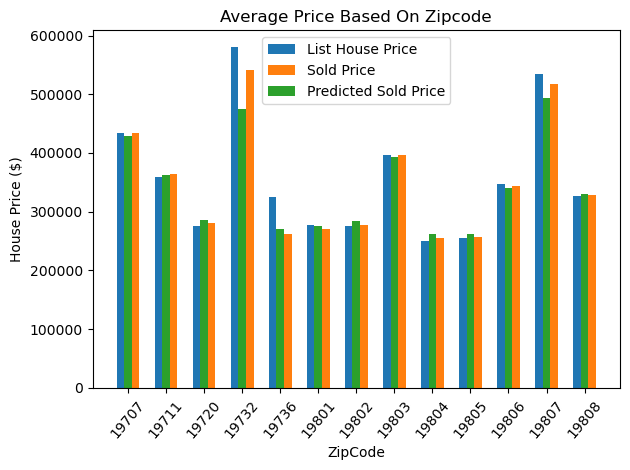

In [57]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,zipcode_price_table.Orig_List_Price,0.2,label="List House Price")
plt.bar(X_axis + 0.2,zipcode_price_table.Sold_Price,0.2,label="Sold Price")
plt.bar(X_axis,zipcode_price_table.Pred_Sold_Price,0.2, label="Predicted Sold Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/soldpred_diff_orig_zipcode.png" ,dpi=400)
plt.show()

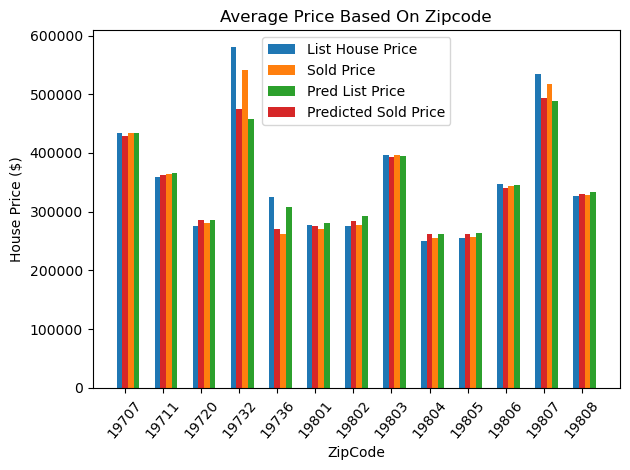

In [58]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.15,zipcode_price_table.Orig_List_Price,0.15,label="List House Price")
plt.bar(X_axis + 0.15,zipcode_price_table.Sold_Price,0.15,label="Sold Price")
plt.bar(X_axis +0.3,zipcode_price_table.Pred_Orig_List_Price,0.15,label="Pred List Price")
plt.bar(X_axis,zipcode_price_table.Pred_Sold_Price,0.15, label="Predicted Sold Price")

plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/overall_diff_orig_zipcode.png" ,dpi=400)
plt.show()

In [61]:
#zipcode_price_table.to_csv("../Resources/zipcode_price_table.csv",index=False)